In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [2]:
# Loading the Build Environment Data for London

# get the current working directory
script_dir = os.getcwd()

# construct the full path to the CSV file
file_path = os.path.join(script_dir, "data/land-use-percentage.csv")

# Load the dataset into a dataframe
df_land_use = pd.read_csv(file_path)

In [3]:
df_land_use.head()

,Area Code,Local Authority Name,Area name,Area of Admin Geography,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,Area of Water,Area of Other Land Uses,Area of Unclassified Land,Total Area of All Land Types,Quality of Fit Indicator
0,00AA,City of London,City of London,3151.48,7.6,0.1,37.5,23.8,0.2,0.4,4.8,13.3,12.2,0.0,100,NaN
1,00ABFX,Barking and Dagenham,Abbey,1278.97,11.6,15.5,8.7,18.9,6.6,2.2,19.8,2.0,14.7,0.0,100,0.57
2,00ABFY,Barking and Dagenham,Alibon,1360.81,11.3,42.3,2.7,13.5,2.0,0.4,22.9,0.0,4.8,0.0,100,-0.01
3,00ABFZ,Barking and Dagenham,Becontree,1284.14,15.2,49.1,3.4,20.5,0.0,0.6,5.9,0.0,5.4,0.0,100,-0.69
4,00ABGA,Barking and Dagenham,Chadwell Heath,3380.42,5.3,15.5,1.7,8.1,0.0,0.7,64.3,0.3,4.2,0.0,100,15.26


In [4]:
# Finding unique borough names
unique_LAN = df_land_use['Local Authority Name'].unique()

# Counting the number of unique boroughs
unique_LAN_count = df_land_use['Local Authority Name'].nunique()

# Display the unique borough names and their count
print("Unique Local Authority Names:")
print(unique_LAN)
print("\nCount of Unique Local Authority Names:")
print(unique_LAN_count)

Unique Local Authority Names:
['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']

Count of Unique Local Authority Names:
33


In [5]:
# drop repeat/unnecessary columns
df_land_use = df_land_use.drop(columns=['Area of Admin Geography', 'Area of Unclassified Land', 'Quality of Fit Indicator', 'Total Area of All Land Types'])


In [6]:
# Group by boroughs together and calculate the mean percentage for each area type, excluding non-numeric columns as our house price data is for boroughs
numeric_cols = df_land_use.select_dtypes(include='number').columns
grouped_df = df_land_use.groupby('Local Authority Name')[numeric_cols].mean().reset_index()

In [7]:
grouped_df.head()

,Local Authority Name,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,Area of Water,Area of Other Land Uses
0,Barking and Dagenham,10.094118,28.435294,5.164706,14.417647,1.670588,1.076471,27.688235,1.864706,9.629412
1,Barnet,9.609524,30.466667,3.457143,13.519048,1.390476,0.771429,34.161905,0.457143,6.176190
2,Bexley,9.380952,34.228571,3.285714,12.285714,0.376190,0.447619,28.895238,4.823810,6.266667
3,Brent,13.033333,31.466667,6.371429,16.038095,2.823810,0.795238,20.204762,1.023810,8.261905
4,Bromley,7.750000,31.186364,2.331818,10.209091,0.918182,0.495455,42.127273,0.322727,4.659091


In [8]:
grouped_df.describe()

,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,Area of Water,Area of Other Land Uses
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,11.870846,25.333116,7.576621,16.459889,1.356746,0.941371,25.340302,2.291341,8.826272
std,3.194067,8.280840,6.511091,4.283938,0.799817,0.284858,9.407708,2.660817,2.995249
min,6.995455,0.100000,2.331818,10.205556,0.200000,0.400000,4.800000,0.137500,4.659091
25%,9.594118,20.250000,3.954167,13.428571,0.705556,0.728571,19.725000,0.550000,6.762500
50%,11.200000,26.320000,5.450000,15.164706,1.085714,0.961111,26.461905,1.529412,8.390000
75%,14.152632,31.186364,10.015789,20.033333,1.812500,1.168421,29.541667,3.236842,10.523529
max,20.172222,38.857143,37.500000,26.050000,3.033333,1.450000,44.244444,13.300000,18.288235


In [9]:
# Check Data Types
print("\nData Types:")
grouped_df.dtypes


Data Types:


Local Authority Name               object
Area of Domestic Buildings        float64
Area of Domestic Gardens          float64
Area of Non Domestic Buildings    float64
Area of Road                      float64
Area of Rail                      float64
Area of Path                      float64
Area of Greenspace                float64
Area of Water                     float64
Area of Other Land Uses           float64
dtype: object

In [10]:
# Loading the House Price Data for London Boroughs

# construct the full path to the CSV file
file_path = os.path.join(script_dir, "data/land-registry-house-prices-borough.csv")

# Load the dataset into a dataframe
df_house= pd.read_csv(file_path)

In [11]:
df_house.head()

,Code,Area,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,Year ending Jun 1997,Year ending Sep 1997,...,Year ending Sep 2015,Year ending Dec 2015,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016,Year ending Mar 2017,Year ending Jun 2017,Year ending Sep 2017,Year ending Dec 2017
0,E09000001,City of London,"105,000","112,500","112,375","121,500","124,250","126,503","130,000","130,000",...,"823,750","800,000","795,000","799,750","800,000","831,400","831,400","812,500","835,000","835,000"
1,E09000002,Barking and Dagenham,"49,000","49,995","50,000","49,995","49,995","49,950","50,000","52,000",...,"235,000","245,500","255,000","265,000","277,000","290,000","300,000","302,000","302,000","300,000"
2,E09000003,Barnet,"85,125","85,000","85,000","85,500","87,000","89,500","91,950","95,000",...,"440,000","450,000","455,000","460,000","470,000","476,500","482,951","500,000","512,000","533,500"
3,E09000004,Bexley,"62,000","62,000","63,125","63,500","65,000","67,000","68,500","70,000",...,"271,000","285,000","295,000","310,000","322,000","328,000","330,000","332,000","336,000","342,500"
4,E09000005,Brent,"68,000","69,000","70,000","71,000","73,000","75,000","76,000","80,000",...,"400,000","415,000","425,000","425,000","450,000","445,000","450,000","465,150","475,000","499,950"


In [12]:
#filter out for the appropriate year based on build area data i.e. (2006)

columns_keep = ['Code', 'Area', 'Year ending Dec 2006']
df_house = df_house[columns_keep]

df_house.rename(columns={'Year ending Dec 2006':'house_price'}, inplace=True)

# Ignore warnings in output
warnings.filterwarnings('ignore')

In [13]:
# Check Data Types
print("\nData Types:")
df_house.dtypes


Data Types:


Code           object
Area           object
house_price    object
dtype: object

In [14]:
# Rename the 'Area' column in df_house to 'Local Authority Name' to match grouped_df
df_house.rename(columns={'Area': 'Local Authority Name'}, inplace=True)

# Ignore warnings in output
warnings.filterwarnings('ignore')

In [15]:
# Merge the two dataframes on 'Local Authority Name'
merged_df = pd.merge(grouped_df, df_house[['Local Authority Name', 'house_price']], on='Local Authority Name', how='left')

In [16]:
merged_df.head()

,Local Authority Name,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,Area of Water,Area of Other Land Uses,house_price
0,Barking and Dagenham,10.094118,28.435294,5.164706,14.417647,1.670588,1.076471,27.688235,1.864706,9.629412,"167,998"
1,Barnet,9.609524,30.466667,3.457143,13.519048,1.390476,0.771429,34.161905,0.457143,6.176190,"273,000"
2,Bexley,9.380952,34.228571,3.285714,12.285714,0.376190,0.447619,28.895238,4.823810,6.266667,"195,000"
3,Brent,13.033333,31.466667,6.371429,16.038095,2.823810,0.795238,20.204762,1.023810,8.261905,"249,950"
4,Bromley,7.750000,31.186364,2.331818,10.209091,0.918182,0.495455,42.127273,0.322727,4.659091,"242,500"


In [17]:
merged_df

,Local Authority Name,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,Area of Water,Area of Other Land Uses,house_price
0,Barking and Dagenham,10.094118,28.435294,5.164706,14.417647,1.670588,1.076471,27.688235,1.864706,9.629412,"167,998"
1,Barnet,9.609524,30.466667,3.457143,13.519048,1.390476,0.771429,34.161905,0.457143,6.176190,"273,000"
2,Bexley,9.380952,34.228571,3.285714,12.285714,0.376190,0.447619,28.895238,4.823810,6.266667,"195,000"
3,Brent,13.033333,31.466667,6.371429,16.038095,2.823810,0.795238,20.204762,1.023810,8.261905,"249,950"
4,Bromley,7.750000,31.186364,2.331818,10.209091,0.918182,0.495455,42.127273,0.322727,4.659091,"242,500"
5,Camden,13.683333,19.727778,13.361111,20.905556,3.033333,1.205556,18.216667,0.466667,9.405556,"357,500"
6,City of London,7.600000,0.100000,37.500000,23.800000,0.200000,0.400000,4.800000,13.300000,12.200000,"337,500"
7,Croydon,10.854167,34.304167,3.954167,13.379167,1.075000,0.791667,29.541667,0.137500,5.933333,"205,000"
8,Ealing,11.200000,27.121739,5.995652,14.730435,2.395652,1.100000,28.156522,0.695652,8.604348,"248,000"
9,Enfield,9.861905,27.761905,4.266667,12.723810,0.585714,0.866667,32.157143,4.814286,6.976190,"210,000"


In [18]:
# Check for NaN values in the entire DataFrame
nan_count = merged_df.isna().sum()
print("Count of NaN values in each column:")
print(nan_count)

Count of NaN values in each column:
Local Authority Name              0
Area of Domestic Buildings        0
Area of Domestic Gardens          0
Area of Non Domestic Buildings    0
Area of Road                      0
Area of Rail                      0
Area of Path                      0
Area of Greenspace                0
Area of Water                     0
Area of Other Land Uses           0
house_price                       0
dtype: int64


In [19]:
# Display the merged dataframe summary statistics, including house_price
summary_stats = merged_df.describe()
print("\nSummary statistics for the merged dataframe:")
summary_stats


Summary statistics for the merged dataframe:


,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,Area of Water,Area of Other Land Uses
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,11.870846,25.333116,7.576621,16.459889,1.356746,0.941371,25.340302,2.291341,8.826272
std,3.194067,8.280840,6.511091,4.283938,0.799817,0.284858,9.407708,2.660817,2.995249
min,6.995455,0.100000,2.331818,10.205556,0.200000,0.400000,4.800000,0.137500,4.659091
25%,9.594118,20.250000,3.954167,13.428571,0.705556,0.728571,19.725000,0.550000,6.762500
50%,11.200000,26.320000,5.450000,15.164706,1.085714,0.961111,26.461905,1.529412,8.390000
75%,14.152632,31.186364,10.015789,20.033333,1.812500,1.168421,29.541667,3.236842,10.523529
max,20.172222,38.857143,37.500000,26.050000,3.033333,1.450000,44.244444,13.300000,18.288235


In [20]:
# Check Data Types
print("\nData Types:")
merged_df.dtypes


Data Types:


Local Authority Name               object
Area of Domestic Buildings        float64
Area of Domestic Gardens          float64
Area of Non Domestic Buildings    float64
Area of Road                      float64
Area of Rail                      float64
Area of Path                      float64
Area of Greenspace                float64
Area of Water                     float64
Area of Other Land Uses           float64
house_price                        object
dtype: object

In [21]:
# Convert the 'house_price' column to numeric (remove commas and convert to int)
merged_df['house_price'] = merged_df['house_price'].str.replace(',', '').astype(float)

In [22]:
# Display the merged dataframe summary statistics, including house_price
summary_stats = merged_df.describe()
print("\nSummary statistics for all columns:")
summary_stats


Summary statistics for all columns:


,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,Area of Water,Area of Other Land Uses,house_price
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,11.870846,25.333116,7.576621,16.459889,1.356746,0.941371,25.340302,2.291341,8.826272,261658.696970
std,3.194067,8.280840,6.511091,4.283938,0.799817,0.284858,9.407708,2.660817,2.995249,71424.115863
min,6.995455,0.100000,2.331818,10.205556,0.200000,0.400000,4.800000,0.137500,4.659091,167998.000000
25%,9.594118,20.250000,3.954167,13.428571,0.705556,0.728571,19.725000,0.550000,6.762500,211500.000000
50%,11.200000,26.320000,5.450000,15.164706,1.085714,0.961111,26.461905,1.529412,8.390000,245000.000000
75%,14.152632,31.186364,10.015789,20.033333,1.812500,1.168421,29.541667,3.236842,10.523529,273000.000000
max,20.172222,38.857143,37.500000,26.050000,3.033333,1.450000,44.244444,13.300000,18.288235,525000.000000


In [23]:
merged_df.head()

,Local Authority Name,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,Area of Water,Area of Other Land Uses,house_price
0,Barking and Dagenham,10.094118,28.435294,5.164706,14.417647,1.670588,1.076471,27.688235,1.864706,9.629412,167998.0
1,Barnet,9.609524,30.466667,3.457143,13.519048,1.390476,0.771429,34.161905,0.457143,6.176190,273000.0
2,Bexley,9.380952,34.228571,3.285714,12.285714,0.376190,0.447619,28.895238,4.823810,6.266667,195000.0
3,Brent,13.033333,31.466667,6.371429,16.038095,2.823810,0.795238,20.204762,1.023810,8.261905,249950.0
4,Bromley,7.750000,31.186364,2.331818,10.209091,0.918182,0.495455,42.127273,0.322727,4.659091,242500.0


In [24]:
# Keeping original dataframe as such
final_df = merged_df.copy()

In [25]:
final_df.head()

,Local Authority Name,Area of Domestic Buildings,Area of Domestic Gardens,Area of Non Domestic Buildings,Area of Road,Area of Rail,Area of Path,Area of Greenspace,Area of Water,Area of Other Land Uses,house_price
0,Barking and Dagenham,10.094118,28.435294,5.164706,14.417647,1.670588,1.076471,27.688235,1.864706,9.629412,167998.0
1,Barnet,9.609524,30.466667,3.457143,13.519048,1.390476,0.771429,34.161905,0.457143,6.176190,273000.0
2,Bexley,9.380952,34.228571,3.285714,12.285714,0.376190,0.447619,28.895238,4.823810,6.266667,195000.0
3,Brent,13.033333,31.466667,6.371429,16.038095,2.823810,0.795238,20.204762,1.023810,8.261905,249950.0
4,Bromley,7.750000,31.186364,2.331818,10.209091,0.918182,0.495455,42.127273,0.322727,4.659091,242500.0


In [26]:
final_df.isna().sum()

Local Authority Name              0
Area of Domestic Buildings        0
Area of Domestic Gardens          0
Area of Non Domestic Buildings    0
Area of Road                      0
Area of Rail                      0
Area of Path                      0
Area of Greenspace                0
Area of Water                     0
Area of Other Land Uses           0
house_price                       0
dtype: int64

In [27]:
# Rename columns as specified
final_df.rename(columns={
    'Area of Domestic Buildings': 'domestic',
    'Area of Domestic Gardens': 'gardens',
    'Area of Non Domestic Buildings': 'commercial',
    'Area of Road': 'road',
    'Area of Rail': 'rail',
    'Area of Path': 'path',
    'Area of Greenspace': 'greenspace',
    'Area of Water': 'water',
    'Area of Other Land Uses': 'other_areas'
}, inplace=True)

In [28]:
# 1. Describe the Data
print("Statistical Summary:")
final_df.describe()

Statistical Summary:


,domestic,gardens,commercial,road,rail,path,greenspace,water,other_areas,house_price
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,11.870846,25.333116,7.576621,16.459889,1.356746,0.941371,25.340302,2.291341,8.826272,261658.696970
std,3.194067,8.280840,6.511091,4.283938,0.799817,0.284858,9.407708,2.660817,2.995249,71424.115863
min,6.995455,0.100000,2.331818,10.205556,0.200000,0.400000,4.800000,0.137500,4.659091,167998.000000
25%,9.594118,20.250000,3.954167,13.428571,0.705556,0.728571,19.725000,0.550000,6.762500,211500.000000
50%,11.200000,26.320000,5.450000,15.164706,1.085714,0.961111,26.461905,1.529412,8.390000,245000.000000
75%,14.152632,31.186364,10.015789,20.033333,1.812500,1.168421,29.541667,3.236842,10.523529,273000.000000
max,20.172222,38.857143,37.500000,26.050000,3.033333,1.450000,44.244444,13.300000,18.288235,525000.000000


In [29]:
# 2. Check Data Types
print("\nData Types:")
final_df.dtypes


Data Types:


Local Authority Name     object
domestic                float64
gardens                 float64
commercial              float64
road                    float64
rail                    float64
path                    float64
greenspace              float64
water                   float64
other_areas             float64
house_price             float64
dtype: object

In [30]:
# Select the numeric columns
numeric_columns = [
    'domestic', 'gardens', 'commercial',
    'road', 'rail', 'path', 'greenspace', 'water',
    'other_areas', 'house_price'
]

# save as a new dataFrame
normalized_df = final_df.copy()

# Check the new dataframe
normalized_df.head()

,Local Authority Name,domestic,gardens,commercial,road,rail,path,greenspace,water,other_areas,house_price
0,Barking and Dagenham,10.094118,28.435294,5.164706,14.417647,1.670588,1.076471,27.688235,1.864706,9.629412,167998.0
1,Barnet,9.609524,30.466667,3.457143,13.519048,1.390476,0.771429,34.161905,0.457143,6.176190,273000.0
2,Bexley,9.380952,34.228571,3.285714,12.285714,0.376190,0.447619,28.895238,4.823810,6.266667,195000.0
3,Brent,13.033333,31.466667,6.371429,16.038095,2.823810,0.795238,20.204762,1.023810,8.261905,249950.0
4,Bromley,7.750000,31.186364,2.331818,10.209091,0.918182,0.495455,42.127273,0.322727,4.659091,242500.0


In [31]:
normalized_df.describe()

,domestic,gardens,commercial,road,rail,path,greenspace,water,other_areas,house_price
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,11.870846,25.333116,7.576621,16.459889,1.356746,0.941371,25.340302,2.291341,8.826272,261658.696970
std,3.194067,8.280840,6.511091,4.283938,0.799817,0.284858,9.407708,2.660817,2.995249,71424.115863
min,6.995455,0.100000,2.331818,10.205556,0.200000,0.400000,4.800000,0.137500,4.659091,167998.000000
25%,9.594118,20.250000,3.954167,13.428571,0.705556,0.728571,19.725000,0.550000,6.762500,211500.000000
50%,11.200000,26.320000,5.450000,15.164706,1.085714,0.961111,26.461905,1.529412,8.390000,245000.000000
75%,14.152632,31.186364,10.015789,20.033333,1.812500,1.168421,29.541667,3.236842,10.523529,273000.000000
max,20.172222,38.857143,37.500000,26.050000,3.033333,1.450000,44.244444,13.300000,18.288235,525000.000000


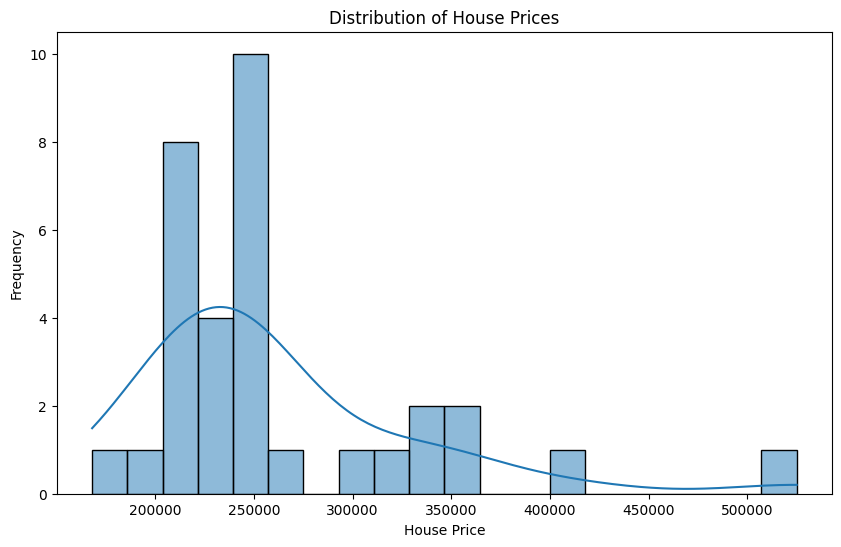

In [32]:

# Plot the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df['house_price'], bins=20, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()


In [33]:

normalized_df['log_house_price'] = np.log(normalized_df['house_price'])


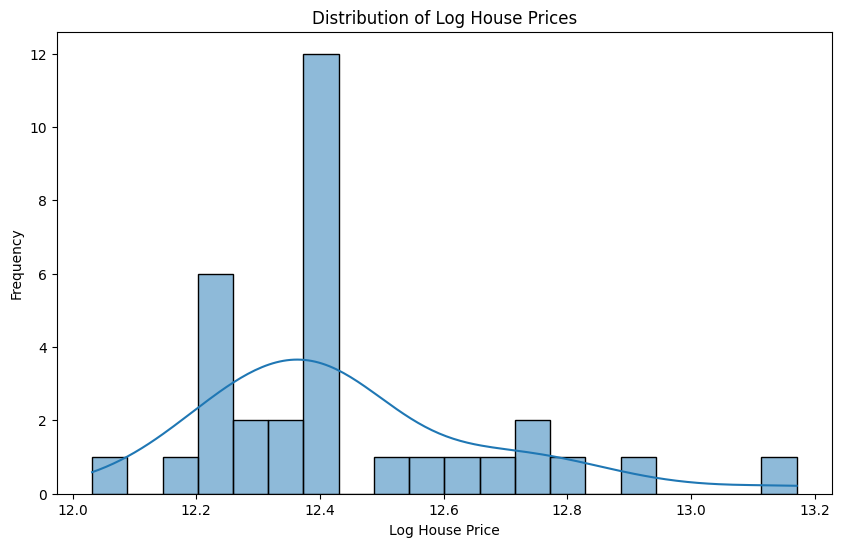

In [34]:

# Plot the distribution of log house prices
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df['log_house_price'], bins=20, kde=True)
plt.title('Distribution of Log House Prices')
plt.xlabel('Log House Price')
plt.ylabel('Frequency')
plt.show()

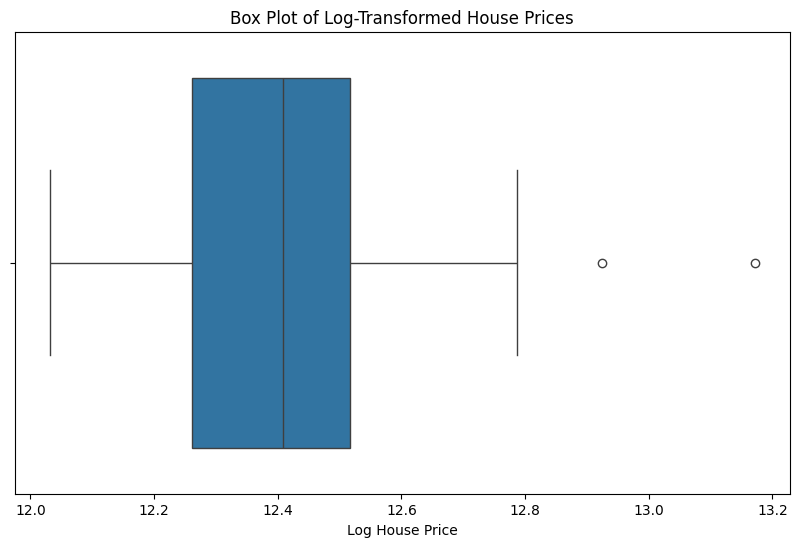

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to check for outliers in the log-transformed house prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=normalized_df['log_house_price'])
plt.title('Box Plot of Log-Transformed House Prices')
plt.xlabel('Log House Price')
plt.show()


In [36]:
# Define the lower and upper bounds
Q1 = normalized_df['log_house_price'].quantile(0.25)
Q3 = normalized_df['log_house_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
filtered_df = normalized_df[(normalized_df['log_house_price'] >= lower_bound) & (normalized_df['log_house_price'] <= upper_bound)]

# Display the shape of the filtered dataframe
print(f"Original dataset size: {normalized_df.shape}")
print(f"Filtered dataset size: {filtered_df.shape}")


Original dataset size: (33, 12)
Filtered dataset size: (31, 12)


In [37]:
filtered_df

,Local Authority Name,domestic,gardens,commercial,road,rail,path,greenspace,water,other_areas,house_price,log_house_price
0,Barking and Dagenham,10.094118,28.435294,5.164706,14.417647,1.670588,1.076471,27.688235,1.864706,9.629412,167998.0,12.031707
1,Barnet,9.609524,30.466667,3.457143,13.519048,1.390476,0.771429,34.161905,0.457143,6.176190,273000.0,12.517227
2,Bexley,9.380952,34.228571,3.285714,12.285714,0.376190,0.447619,28.895238,4.823810,6.266667,195000.0,12.180755
3,Brent,13.033333,31.466667,6.371429,16.038095,2.823810,0.795238,20.204762,1.023810,8.261905,249950.0,12.429016
4,Bromley,7.750000,31.186364,2.331818,10.209091,0.918182,0.495455,42.127273,0.322727,4.659091,242500.0,12.398757
5,Camden,13.683333,19.727778,13.361111,20.905556,3.033333,1.205556,18.216667,0.466667,9.405556,357500.0,12.786891
6,City of London,7.600000,0.100000,37.500000,23.800000,0.200000,0.400000,4.800000,13.300000,12.200000,337500.0,12.729321
7,Croydon,10.854167,34.304167,3.954167,13.379167,1.075000,0.791667,29.541667,0.137500,5.933333,205000.0,12.230765
8,Ealing,11.200000,27.121739,5.995652,14.730435,2.395652,1.100000,28.156522,0.695652,8.604348,248000.0,12.421184
9,Enfield,9.861905,27.761905,4.266667,12.723810,0.585714,0.866667,32.157143,4.814286,6.976190,210000.0,12.254863


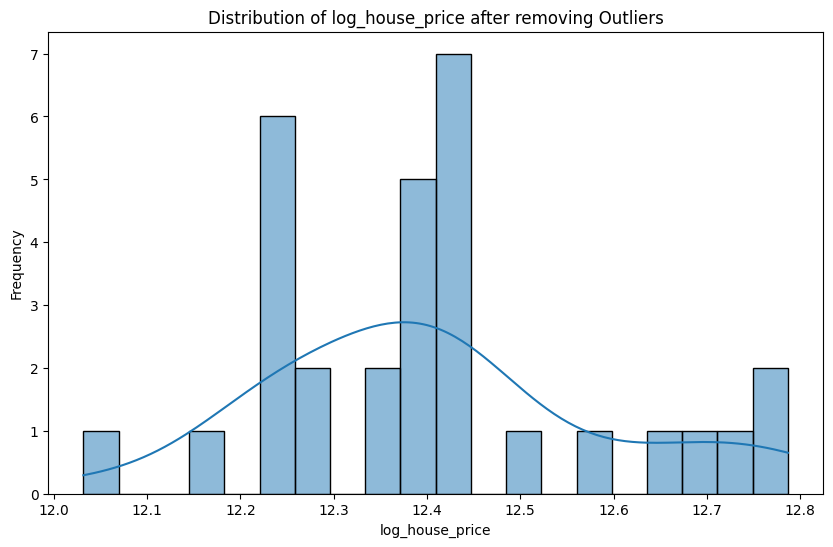

In [38]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['log_house_price'],bins=20, kde=True)
plt.title('Distribution of log_house_price after removing Outliers')
plt.xlabel('log_house_price')
plt.ylabel('Frequency')
plt.show()

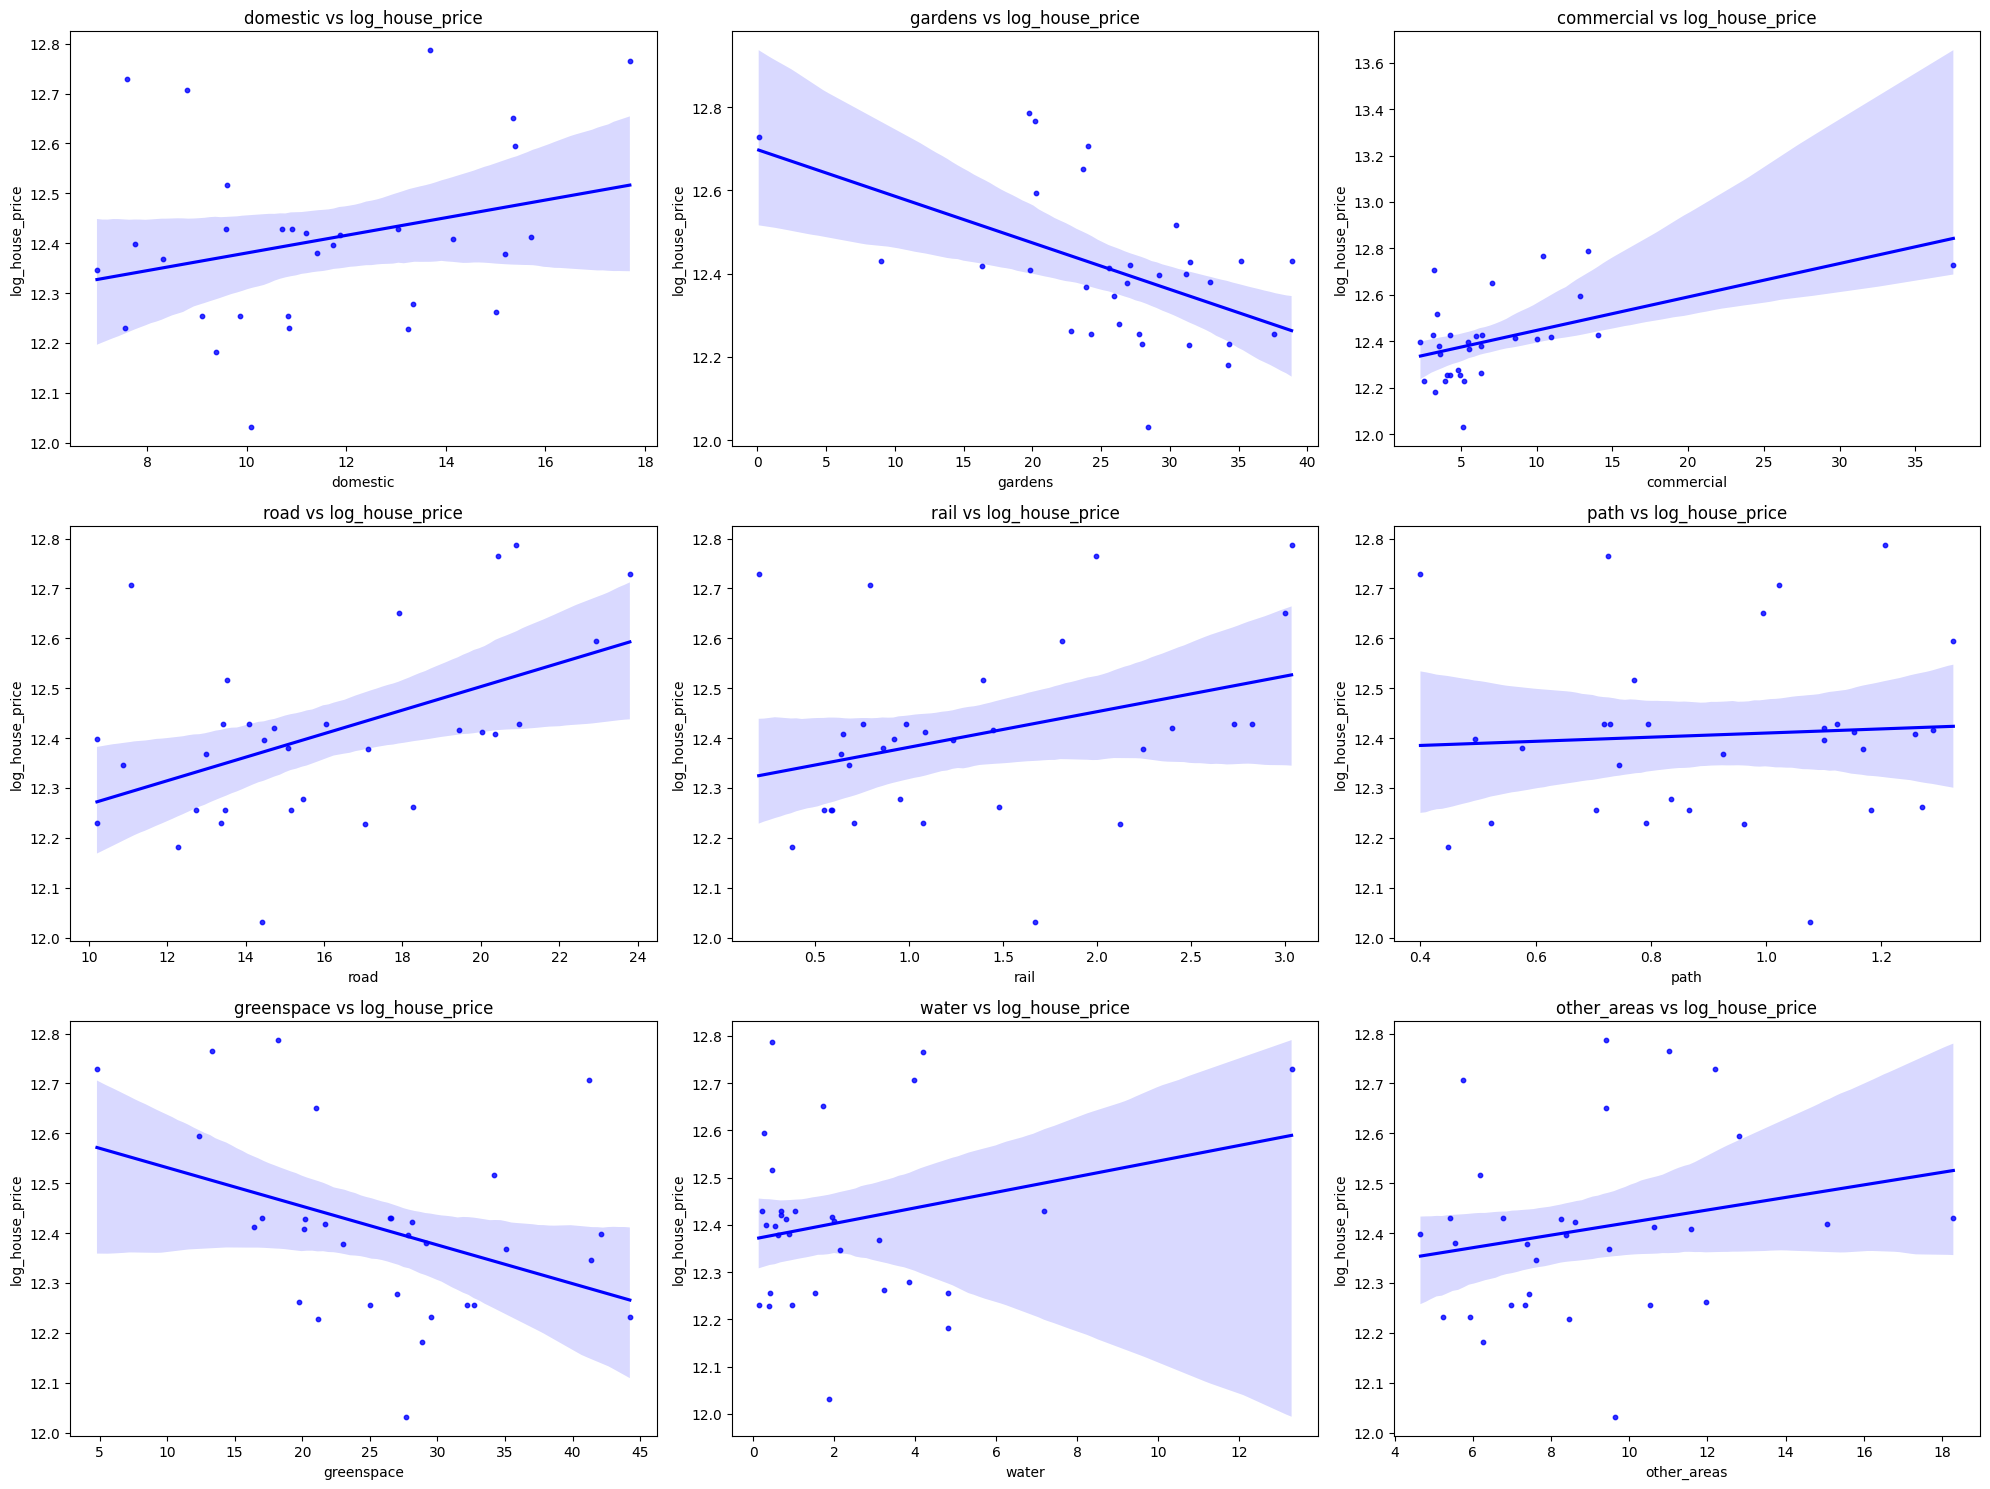

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the independent variables
variables = ['domestic', 'gardens', 'commercial', 'road', 'rail', 'path', 'greenspace', 'water', 'other_areas']

# Create scatter plots with regression lines for each independent variable against log_house_price
plt.figure(figsize=(20, 15))

for i, column in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots (adjusted for 9 variables)
    sns.regplot(x=filtered_df[column], y=filtered_df['log_house_price'], scatter_kws={'s':10},color='blue')
    plt.title(f'{column} vs log_house_price')
    plt.xlabel(column)
    plt.ylabel('log_house_price')

plt.tight_layout()
plt.show()


In [40]:
# Select the numeric columns for normalization
numeric_columns = [
    'domestic', 'gardens', 'commercial',
    'road', 'rail', 'path', 'greenspace', 'water',
    'other_areas', 'log_house_price'
]

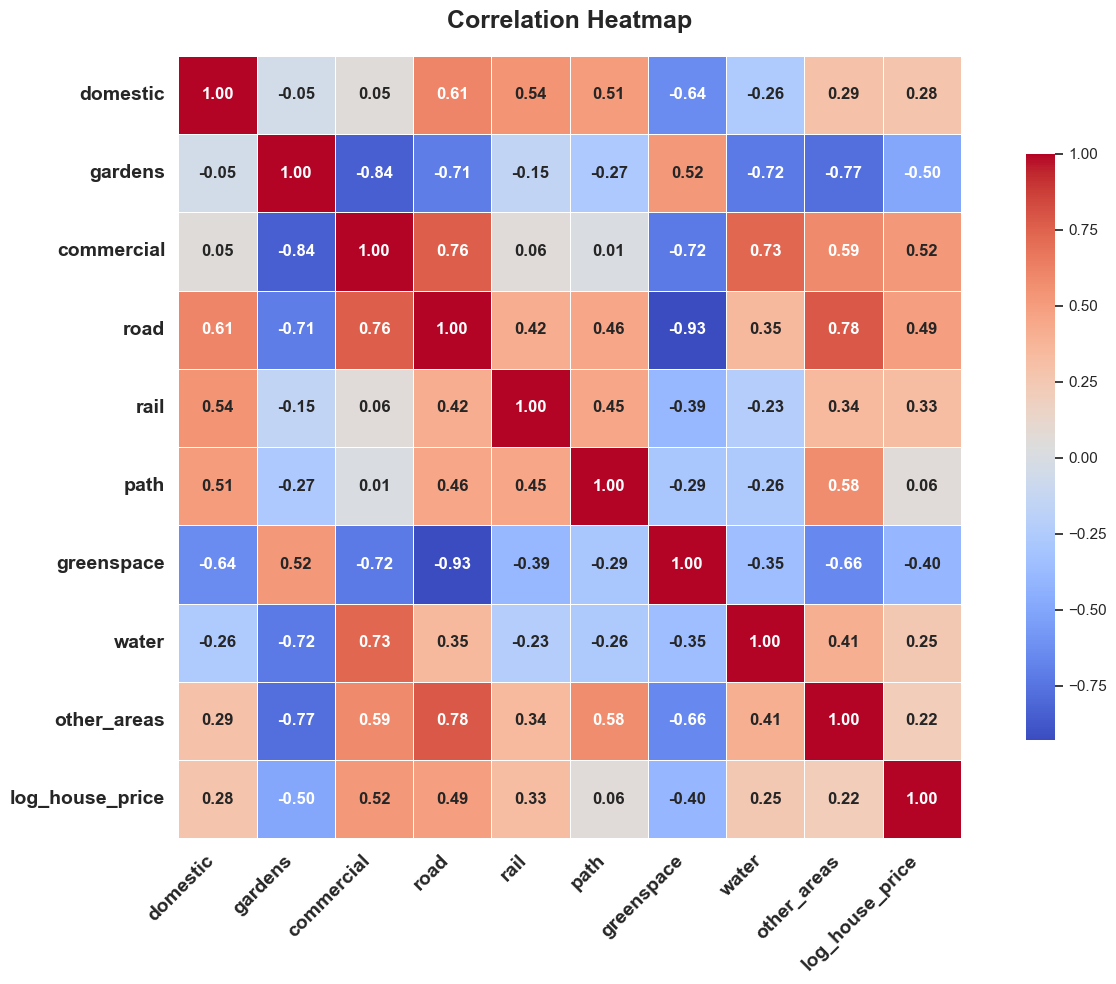

In [41]:
# Compute the correlation matrix
corr = filtered_df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")
heatmap = sns.heatmap(
    corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, 
    cbar_kws={"shrink": .75}, square=True, 
    annot_kws={"size": 12, "fontweight": 'bold'}
)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=14, fontweight='bold')
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

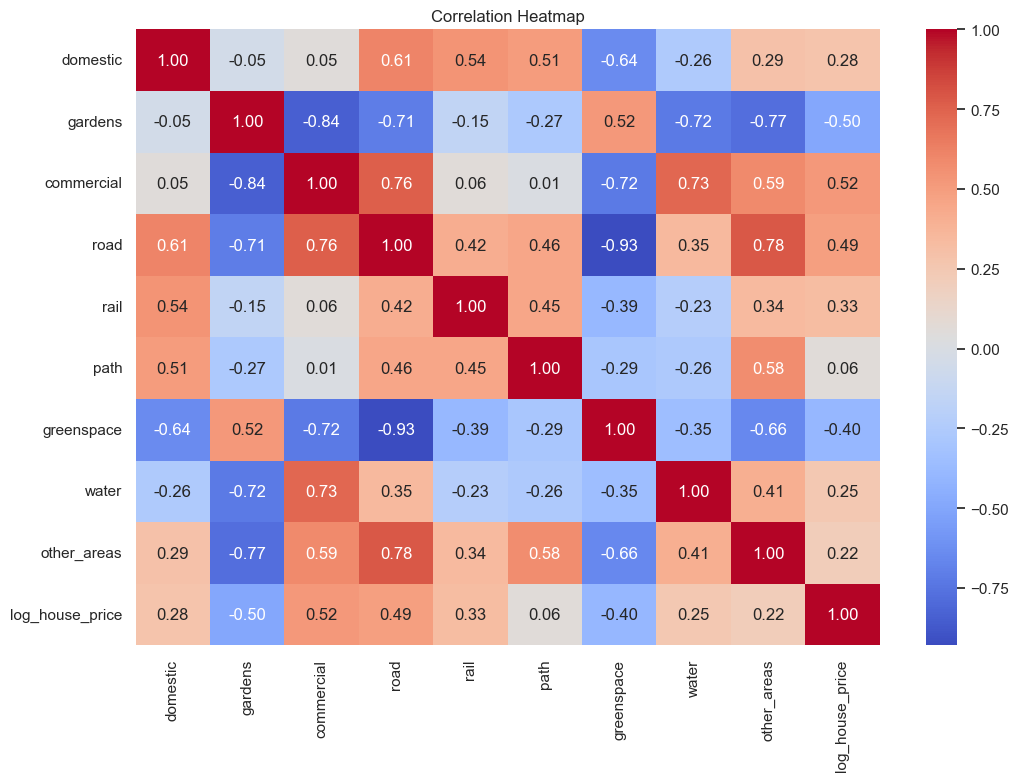

In [42]:
# c. Correlation Heatmap
plt.figure(figsize=(12, 8))
# Compute the correlation matrix
corr = filtered_df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
# Regression

# Prepare the data
X = filtered_df[numeric_columns].drop('log_house_price', axis=1)
y = filtered_df['log_house_price']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_house_price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     3.461
Date:                Thu, 29 Aug 2024   Prob (F-statistic):            0.00911
Time:                        01:42:25   Log-Likelihood:                 23.710
No. Observations:                  31   AIC:                            -27.42
Df Residuals:                      21   BIC:                            -13.08
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         108.1731     73.338      1.475      0.155     -44.341     260.687
domestic       -0.9269      0.726     -1.277      0.216      -2.436       0.583
gardens        -0.9755      0.735     -1.328      0.199      -2.503       0.552
commercial     -0.9485      0.735     -1.291      0.211      -2.476       0.579
road           -0.9491      0.742     -1.280      0.215      -2.492       0.593
rail           -0.8831      0.719     -1.227      0.233      -2.379       0.613
path           -1.0770      0.750     -1.436      0.166      -2.637       0.483
greenspace     -0.9494      0.733     -1.295      0.209      -2.474       0.575
water          -0.9687      0.731     -1.324      0.200      -2.490       0.552
other_areas    -0.9889      0.731     -1.352      0.191      -2.510       0.532
==============================================================================
Omnibus:                        0.113   Durbin-Watson:                   2.551
Prob(Omnibus):                  0.945   Jarque-Bera (JB):                0.094
Skew:                          -0.095   Prob(JB):                        0.954
Kurtosis:                       2.808   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# VIF

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,feature,VIF
0,const,8.905712e+06
1,domestic,6.736297e+03
2,gardens,5.539913e+04
3,commercial,3.652472e+04
4,road,1.246837e+04
5,rail,5.627805e+02
6,path,6.481551e+01
7,greenspace,7.317524e+04
8,water,6.247432e+03
9,other_areas,8.169291e+03


In [45]:
# Dropping first variable with high VIF (Greenspace)
X = X.drop(['greenspace' ], axis=1)

# Recalculate VIF after dropping high VIF variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

       feature         VIF
0        const  288.641473
1     domestic    8.502529
2      gardens    8.799863
3   commercial   20.117556
4         road   34.352996
5         rail    1.696206
6         path    3.560854
7        water    5.355753
8  other_areas    8.381377


In [46]:
#Refit the model

# Fit the model with the adjusted X
model = sm.OLS(y, X).fit()

# Print the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_house_price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     3.574
Date:                Thu, 29 Aug 2024   Prob (F-statistic):            0.00840
Time:                        01:42:25   Log-Likelihood:                 22.518
No. Observations:                  31   AIC:                            -27.04
Df Residuals:                      22   BIC:                            -14.13
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.1674      0.424     31.062      0.000      12.288      14.047
domestic        0.0128      0.026      0.489      0.630      -0.041       0.067
gardens        -0.0238      0.009     -2.529      0.019      -0.043      -0.004
commercial      0.0029      0.018      0.167      0.869      -0.033       0.039
road            0.0105      0.040      0.265      0.794      -0.072       0.092
rail            0.0476      0.040      1.187      0.248      -0.036       0.131
path           -0.1324      0.179     -0.742      0.466      -0.503       0.238
water          -0.0215      0.022     -0.990      0.333      -0.067       0.024
other_areas    -0.0421      0.024     -1.769      0.091      -0.091       0.007
==============================================================================
Omnibus:                        0.584   Durbin-Watson:                   2.499
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.084
Skew:                           0.098   Prob(JB):                        0.959
Kurtosis:                       3.161   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Dropping first variable with high VIF (Area of Road)
X = X.drop(['road' ], axis=1)

# Recalculate VIF after dropping high VIF variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

       feature         VIF
0        const  271.494224
1     domestic    1.845450
2      gardens    8.749110
3   commercial    4.699716
4         rail    1.689645
5         path    3.560325
6        water    4.590646
7  other_areas    4.117187


In [48]:
#Refit the model

# Fit the model with the adjusted X
model = sm.OLS(y, X).fit()

# Print the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_house_price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     4.246
Date:                Thu, 29 Aug 2024   Prob (F-statistic):            0.00384
Time:                        01:42:25   Log-Likelihood:                 22.469
No. Observations:                  31   AIC:                            -28.94
Df Residuals:                      23   BIC:                            -17.47
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.1948      0.403     32.764      0.000      12.362      14.028
domestic        0.0189      0.012      1.585      0.127      -0.006       0.044
gardens        -0.0236      0.009     -2.568      0.017      -0.043      -0.005
commercial      0.0070      0.008      0.842      0.408      -0.010       0.024
rail            0.0469      0.039      1.197      0.244      -0.034       0.128
path           -0.1318      0.175     -0.754      0.459      -0.493       0.230
water          -0.0237      0.020     -1.201      0.242      -0.064       0.017
other_areas    -0.0376      0.016     -2.302      0.031      -0.071      -0.004
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   2.483
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.079
Skew:                           0.081   Prob(JB):                        0.961
Kurtosis:                       3.186   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Dropping first variable with high VIF (Area of Gardens)
X = X.drop(['gardens' ], axis=1)

# Recalculate VIF after dropping high VIF variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

       feature        VIF
0        const  27.843324
1     domestic   1.696605
2   commercial   2.940354
3         rail   1.625585
4         path   2.899240
5        water   3.409862
6  other_areas   3.737652


In [50]:
#Refit the model

# Fit the model with the adjusted X
model = sm.OLS(y, X).fit()

# Print the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_house_price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     3.126
Date:                Thu, 29 Aug 2024   Prob (F-statistic):             0.0208
Time:                        01:42:25   Log-Likelihood:                 18.560
No. Observations:                  31   AIC:                            -23.12
Df Residuals:                      24   BIC:                            -13.08
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2149      0.143     85.289      0.000      11.919      12.510
domestic        0.0102      0.013      0.803      0.430      -0.016       0.036
commercial      0.0200      0.007      2.748      0.011       0.005       0.035
rail            0.0665      0.043      1.558      0.132      -0.022       0.155
path            0.0617      0.175      0.352      0.728      -0.300       0.423
water           0.0020      0.019      0.106      0.917      -0.037       0.041
other_areas    -0.0249      0.017     -1.439      0.163      -0.061       0.011
==============================================================================
Omnibus:                        2.137   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                0.985
Skew:                           0.143   Prob(JB):                        0.611
Kurtosis:                       3.825   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

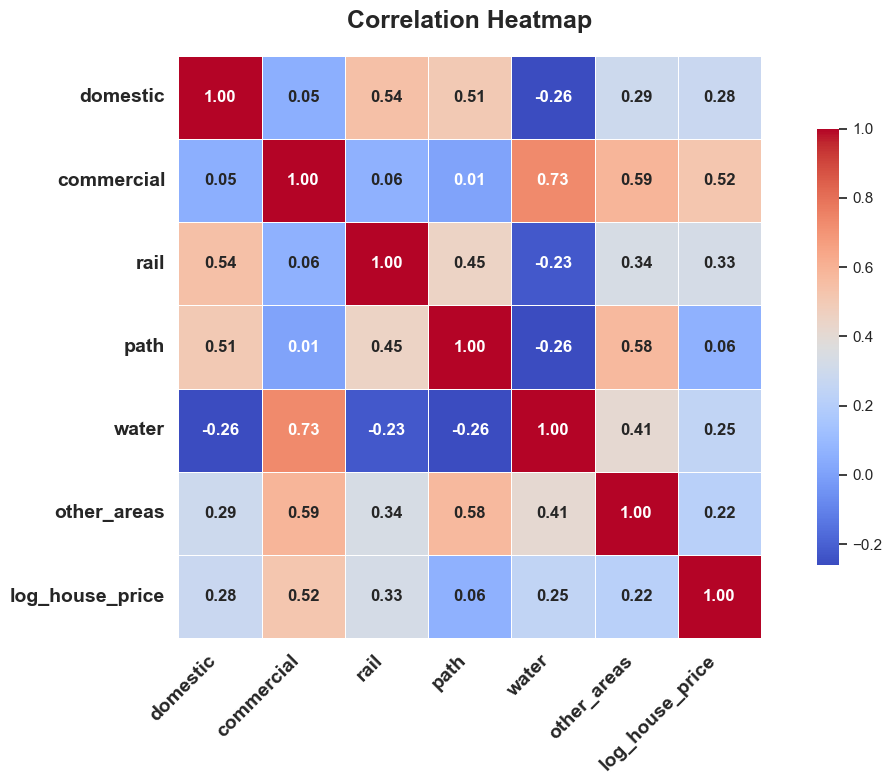

In [51]:
# c. Correlation Heatmap
final_columns = [
    'domestic',
    'commercial',
    'rail',
    'path',
    'water',
    'other_areas',
    'log_house_price'
]

corr_df = filtered_df[final_columns]
plt.figure(figsize=(12, 8))
corr = corr_df.corr()
sns.set_theme(style="whitegrid")
heatmap = sns.heatmap(
    corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, 
    cbar_kws={"shrink": .75}, square=True, 
    annot_kws={"size": 12, "fontweight": 'bold'}
)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=14, fontweight='bold')
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

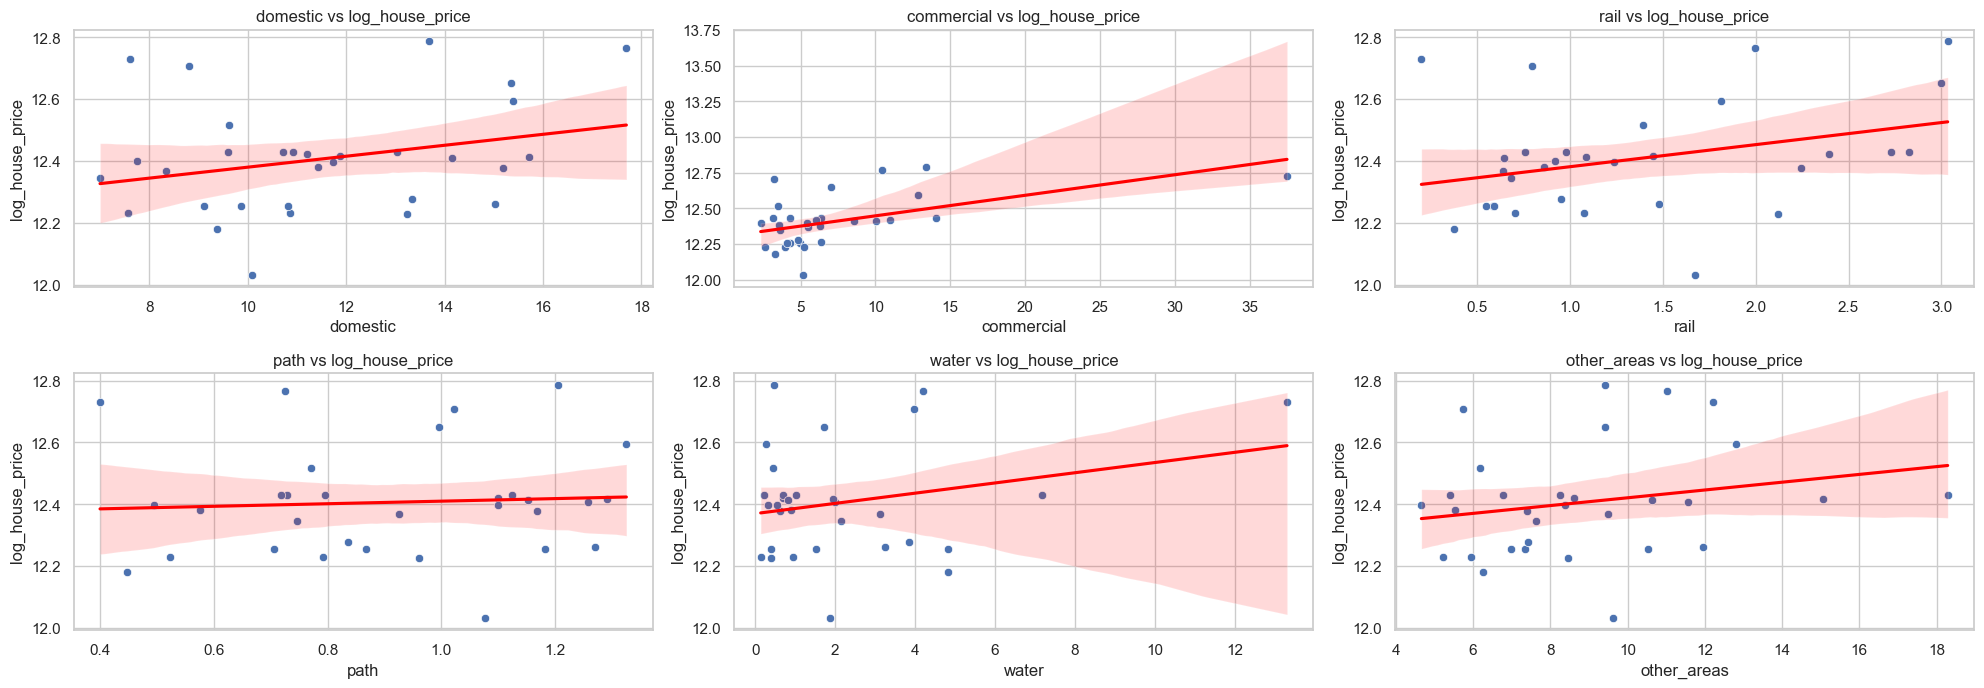

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots with trend lines
plt.figure(figsize=(20, 10))

# Plot each variable against log_house_price
for i, column in enumerate(final_columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=filtered_df, x=column, y='log_house_price')
    sns.regplot(data=filtered_df, x=column, y='log_house_price', scatter=False, color='red')
    plt.title(f'{column} vs log_house_price')

plt.tight_layout()
plt.show()


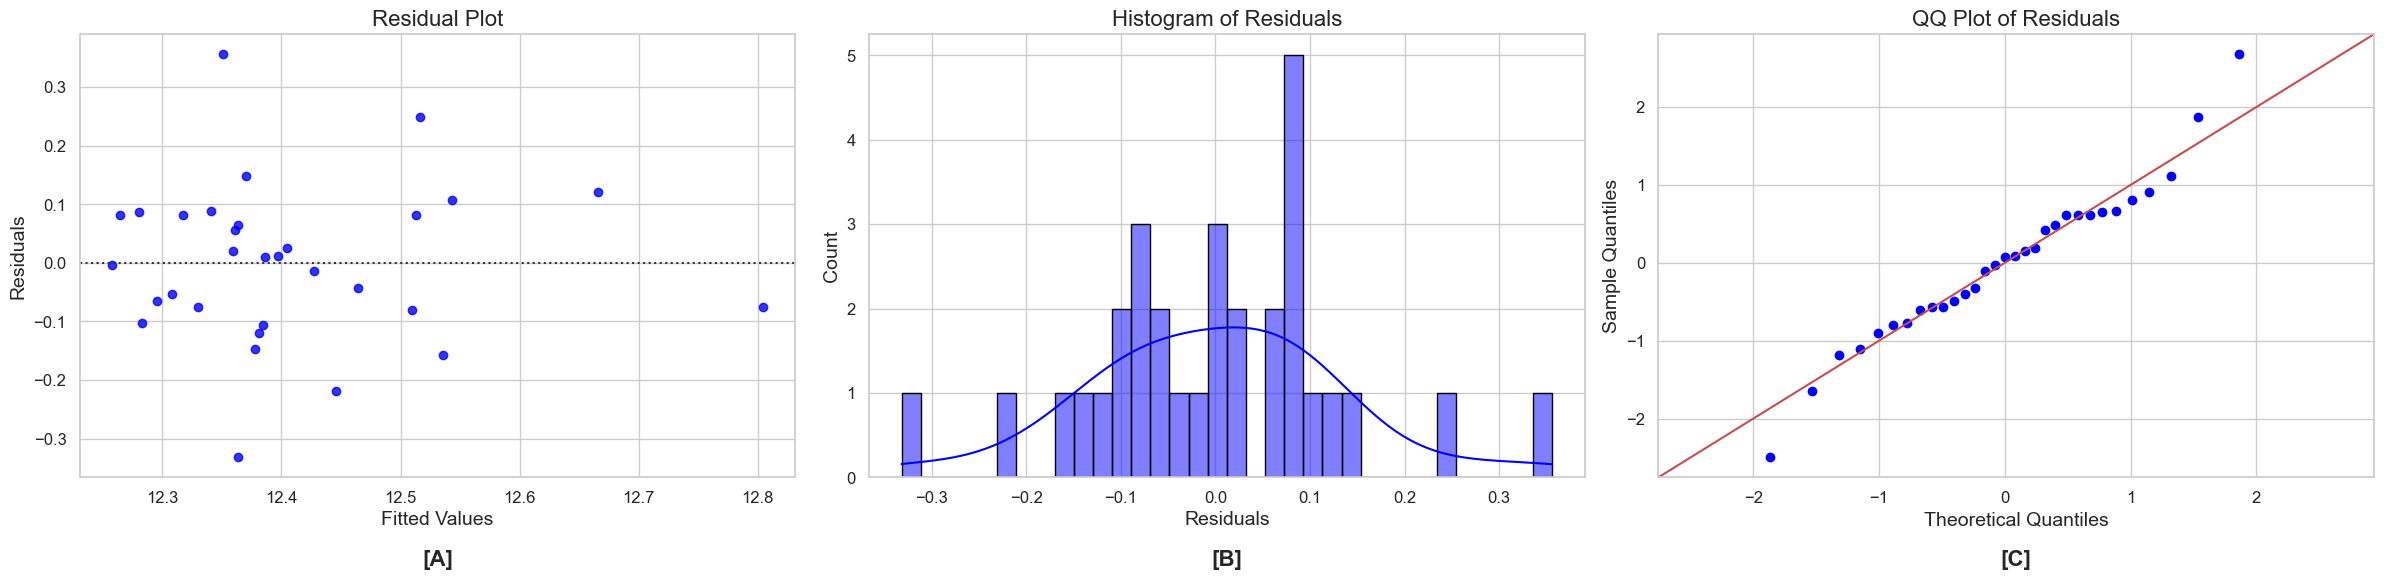

In [53]:
#QQ Plot

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Residual plot without the red lowess line
sns.residplot(x=model.fittedvalues, y=model.resid, color='blue', lowess=False, ax=axs[0])
axs[0].set_xlabel('Fitted Values', fontsize=14)
axs[0].set_ylabel('Residuals', fontsize=14)
axs[0].set_title('Residual Plot', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].text(0.5, -0.2, '[A]', transform=axs[0].transAxes, fontsize=16, fontweight='bold', ha='center')

# Histogram of residuals with better styling
sns.histplot(model.resid, kde=True, color='blue', edgecolor='black', binwidth=0.02, ax=axs[1])
axs[1].set_xlabel('Residuals', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
axs[1].set_title('Histogram of Residuals', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].grid(True)
axs[1].text(0.5, -0.2, '[B]', transform=axs[1].transAxes, fontsize=16, fontweight='bold', ha='center')

# QQ plot of residuals
sm.qqplot(model.resid, fit=True, line="45", ax=axs[2], markerfacecolor='blue', markeredgecolor='blue')
axs[2].set_title('QQ Plot of Residuals', fontsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].set_xlabel('Theoretical Quantiles', fontsize=14)
axs[2].set_ylabel('Sample Quantiles', fontsize=14)
axs[2].grid(True)
axs[2].text(0.5, -0.2, '[C]', transform=axs[2].transAxes, fontsize=16, fontweight='bold', ha='center')

# Adjust layout
plt.tight_layout()
plt.show()


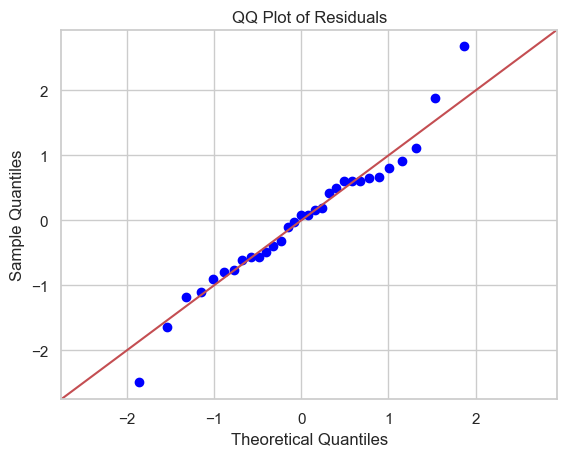

In [54]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# QQ plot of residuals
fig = sm.qqplot(model.resid, fit=True, line="45", markerfacecolor='blue', markeredgecolor='blue')
plt.title('QQ Plot of Residuals')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()


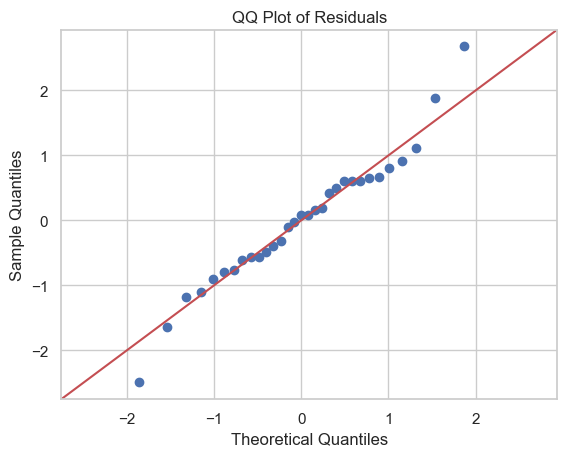

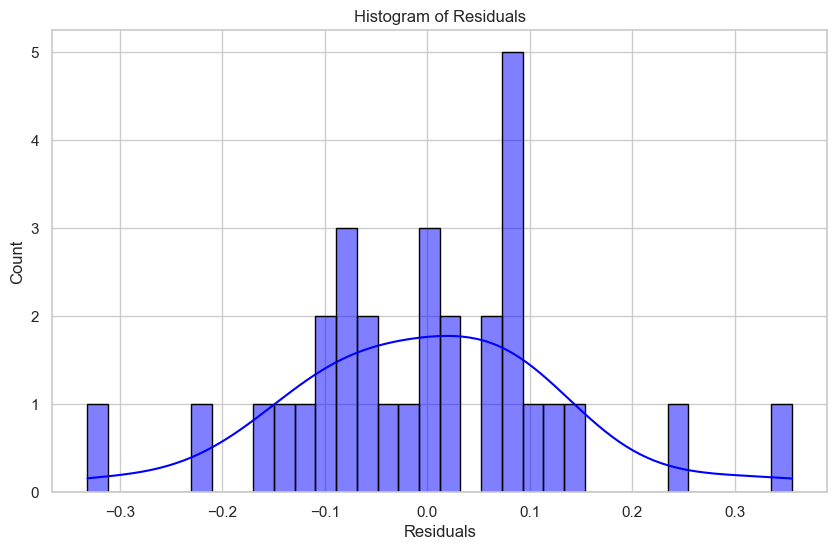

In [55]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# QQ plot of residuals
fig = sm.qqplot(model.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()

# Histogram of residuals with better styling
plt.figure(figsize=(10, 6))
sns.histplot(model.resid, kde=True, color='blue', edgecolor='black', binwidth=0.02)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()
